###Mount drive to import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Functions

In [ ]:
def quickHistogram(labels): 
  classes = ["other", "tech"]
  counts = []

  for i in range(len(classes)):
    count = 0
    for j in labels:
      if j == i:
        count += 1
    counts.append(count)

  plt.bar(["other", "tech"], counts)
  plt.show()

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Datasets

In [ ]:
import pandas as pd
dataBBC = pd.read_csv("/content/drive/MyDrive/Mestrado/Datasets/bbc-news-data.csv", delimiter='\t')

dataMCTI = pd.read_excel("/content/drive/MyDrive/Mestrado/Datasets/oportunidades_classificacao_4.xlsx", sheet_name='Oportunidades')

In [ ]:
import requests
import pandas as pd
url = 'https://github.com/chap0lin/nlp_datasets/blob/master/oportunidades_classificacao_4.xlsx?raw=true'
r = requests.get(url)
open('temp.xlsx', 'wb').write(r.content)
dataMCTI = pd.read_excel('temp.xlsx', sheet_name='Oportunidades')

url2 = 'https://github.com/chap0lin/nlp_datasets/blob/master/bbc-news-data.csv?raw=true'
r2 = requests.get(url2)
open('temp2.csv', 'wb').write(r2.content)
dataBBC = pd.read_csv('temp2.csv', delimiter='\t')

In [ ]:
print("BBC article Dataset has " + str(dataBBC.shape[0]) + " examples with " + str(dataBBC.shape[1]) + " columns of information")

print("MCTI Dataset has " + str(dataMCTI.shape[0]) + " examples with " + str(dataMCTI.shape[1]) + " columns of information")

BBC article Dataset has 2225 examples with 4 columns of information
MCTI Dataset has 357 examples with 11 columns of information


In [ ]:
dataBBC['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
dataMCTI['clas'].value_counts()

Y    152
N    108
Name: clas, dtype: int64

In [ ]:
#create BBC data subset to reflect the MCTI dataset
subsampleBBC = dataBBC.copy() 
subsampleBBC = subsampleBBC.drop(subsampleBBC[subsampleBBC['category'] == 'business'].sample(frac=0.9, random_state=1).index)
subsampleBBC = subsampleBBC.drop(subsampleBBC[subsampleBBC['category'] == 'entertainment'].sample(frac=0.9, random_state=1).index)
subsampleBBC = subsampleBBC.drop(subsampleBBC[subsampleBBC['category'] == 'politics'].sample(frac=0.9, random_state=1).index)
subsampleBBC = subsampleBBC.drop(subsampleBBC[subsampleBBC['category'] == 'sport'].sample(frac=0.9, random_state=1).index)
subsampleBBC = subsampleBBC.drop(subsampleBBC[subsampleBBC['category'] == 'tech'].sample(frac=0.5, random_state=1).index)

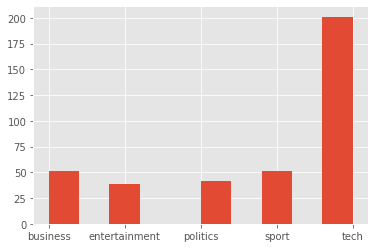

In [ ]:
subsampleBBC['category'].hist()

In [ ]:
sentencesBBC = subsampleBBC['content']
labelsBBC = subsampleBBC['category']

labelsBBC = np.where(labelsBBC == "tech", 1, 0)

In [ ]:
sentencesMCTI = dataMCTI['opo_texto']
labels = dataMCTI['clas']

newdata = dataMCTI.copy()
newdata = newdata[(newdata['clas'] == 'Y') | (newdata['clas'] == 'N')]
sentencesMCTI = newdata['opo_texto']
labelsMCTI = newdata['clas']

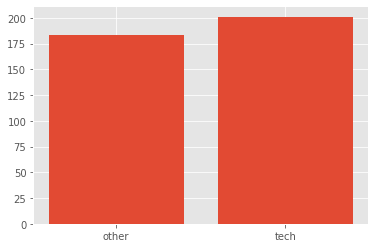

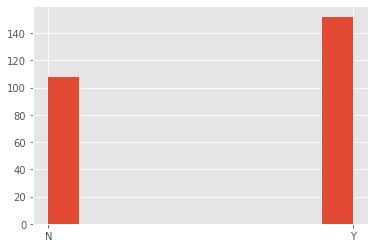

In [ ]:
#compare histograms
quickHistogram(labelsBBC)

dataMCTI['clas'].hist()

### Train Test Split

In [ ]:
#BBC
x_trainBBC, x_testBBC, y_trainBBC, y_testBBC = train_test_split(sentencesBBC, labelsBBC, test_size=0.20, random_state=32)

In [ ]:
#MCTI
x_trainMCTI, x_testMCTI, y_trainMCTI, y_testMCTI = train_test_split(sentencesMCTI, labelsMCTI, test_size=0.20, random_state=32)

Calculando vocab size e aplicando one hot encoding

In [ ]:
alltext = ""
for s in x_trainBBC:
  alltext+= s
for s in x_testBBC:
  alltext+= s

vocab = nltk.word_tokenize(alltext)
vocabBBC = set(vocab)

In [ ]:
bbc_vocab_size = len(vocabBBC)
bbc_encoded_sent_train = [one_hot(i, bbc_vocab_size) for i in x_trainBBC]
bbc_encoded_sent_test = [one_hot(i, bbc_vocab_size) for i in x_testBBC]

In [ ]:
max_sizeBBC = 0
for sent in bbc_encoded_sent_train:
  if len(sent) > max_sizeBBC:
    max_sizeBBC = len(sent)
for sent in bbc_encoded_sent_test:
  if len(sent) > max_sizeBBC:
    max_sizeBBC = len(sent)

In [ ]:
lengthBBC = max_sizeBBC
BBC_train = pad_sequences(bbc_encoded_sent_train, maxlen=lengthBBC, padding='pre')
BBC_test = pad_sequences(bbc_encoded_sent_test, maxlen=lengthBBC, padding='pre')

In [ ]:
alltext = ""
for s in x_trainMCTI:
  alltext+= s
for s in x_testMCTI:
  alltext+= s

vocab = nltk.word_tokenize(alltext)
vocabMCTI = set(vocab)

In [ ]:
MCTI_vocab_size = len(vocabMCTI)
MCTI_encoded_sent_train = [one_hot(i, MCTI_vocab_size) for i in x_trainMCTI]
MCTI_encoded_sent_test = [one_hot(i, MCTI_vocab_size) for i in x_testMCTI]

In [ ]:
max_sizeMCTI = 0
for sent in MCTI_encoded_sent_train:
  if len(sent) > max_sizeMCTI:
    max_sizeMCTI = len(sent)
for sent in MCTI_encoded_sent_test:
  if len(sent) > max_sizeMCTI:
    max_sizeMCTI = len(sent)

In [ ]:
lengthMCTI = max_sizeMCTI
MCTI_train = pad_sequences(MCTI_encoded_sent_train, maxlen=lengthMCTI, padding='pre')
MCTI_test = pad_sequences(MCTI_encoded_sent_test, maxlen=lengthMCTI, padding='pre')

## Modelo

In [ ]:
bbcModel = Sequential()
bbcModel.add(Embedding(bbc_vocab_size, 8, input_length=lengthBBC))
bbcModel.add(Flatten())
bbcModel.add(Dense(1, activation='sigmoid'))

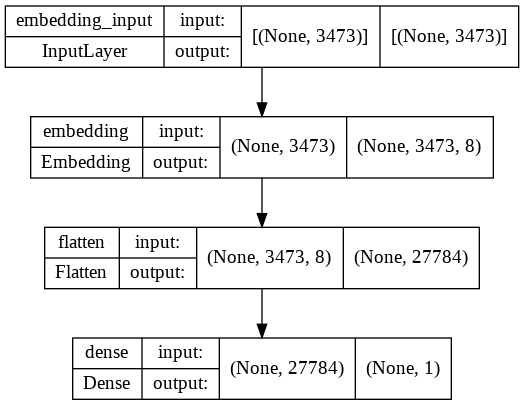

In [ ]:
keras.utils.plot_model(bbcModel, show_shapes=True)

In [ ]:
# add checkpoint to save the network and stop if training doesn't improve
filepath = "best weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
callbacks_list = [checkpoint, earlystop]

bbcModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fiting  the model
historyBBC = bbcModel.fit(BBC_train, y_trainBBC, epochs=100, callbacks=callbacks_list, verbose=True, validation_data=(BBC_test, y_testBBC), batch_size=128)

# evaluate the model
modelloss, modelaccuracy = bbcModel.evaluate(BBC_test, y_testBBC, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/100
1/3 [=========>....................] - ETA: 1s - loss: 0.6958 - accuracy: 0.4844
Epoch 1: val_loss improved from inf to 0.68265, saving model to best weights.h5
3/3 [==============================] - 1s 113ms/step - loss: 0.6928 - accuracy: 0.5114 - val_loss: 0.6826 - val_accuracy: 0.5325
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6775 - accuracy: 0.5312
Epoch 2: val_loss improved from 0.68265 to 0.67493, saving model to best weights.h5
3/3 [==============================] - 0s 39ms/step - loss: 0.6732 - accuracy: 0.5472 - val_loss: 0.6749 - val_accuracy: 0.6883
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6612 - accuracy: 0.7344
Epoch 3: val_loss improved from 0.67493 to 0.66587, saving model to best weights.h5
3/3 [==============================] - 0s 40ms/step - loss: 0.6563 - accuracy: 0.7036 - val_loss: 0.6659 - val_accuracy: 0.6883
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6451 - accuracy: 0.

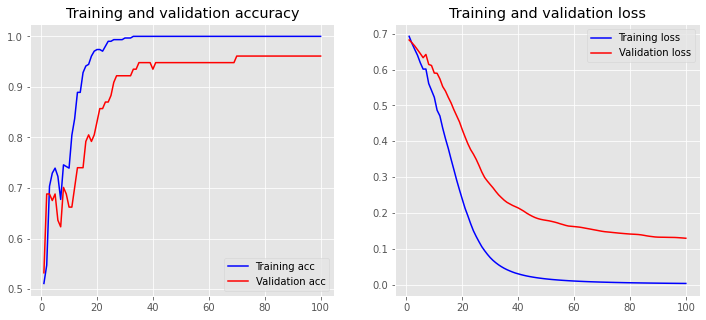

In [ ]:
plot_history(historyBBC)

In [ ]:
mctiModel = Sequential()
mctiModel.add(Embedding(MCTI_vocab_size, 8, input_length=lengthMCTI))
mctiModel.add(Flatten())
mctiModel.add(Dense(1, activation='sigmoid'))

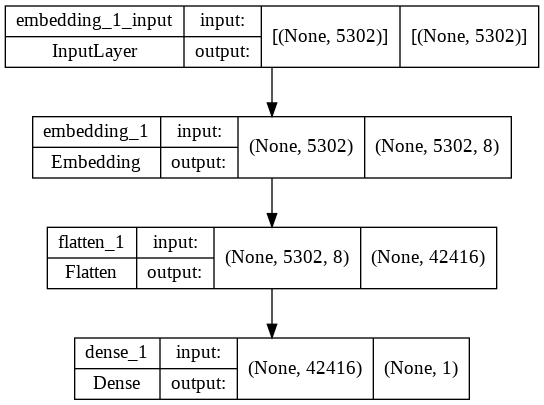

In [ ]:
keras.utils.plot_model(mctiModel, show_shapes=True)

In [ ]:
# add checkpoint to save the network and stop if training doesn't improve
filepath = "best weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
callbacks_list = [checkpoint, earlystop]

mctiModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fiting  the model
historyMCTI = mctiModel.fit(MCTI_train, y_trainMCTI, epochs=100, callbacks=callbacks_list, verbose=True, validation_data=(MCTI_test, y_testMCTI), batch_size=128)

# evaluate the model
modelloss, modelaccuracy = mctiModel.evaluate(MCTI_test, y_testMCTI, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/100


UnimplementedError: ignored

In [ ]:
plot_history(historyMCTI)